In [3]:
# Import Pandas library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



In [5]:
# Load the newly uploaded Train.csv file into a Pandas DataFrame
file_path = 'Resources/train_cleaned.csv'

# Load the dataset
train_data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
train_data.head()

,ID,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Credit_History_Age_Months
0,0x1608,19114.12,1824.843333,3,4,3,4,3,8,4.0,Good,809.98,22.537593,No,49.574949,178.344067,244.565317,Good,271
1,0x160f,34847.84,3037.986667,2,4,6,1,7,1,2.0,Good,605.03,38.550848,No,18.816215,40.391238,484.591214,Good,320
2,0x1612,34847.84,3037.986667,2,4,6,1,3,1,2.0,Good,605.03,34.977895,No,18.816215,130.115420,444.867032,Good,323
3,0x1613,34847.84,3037.986667,2,4,6,1,3,0,2.0,Good,605.03,33.381010,No,18.816215,43.477190,481.505262,Good,324
4,0x1615,34847.84,3037.986667,2,4,6,1,3,4,2.0,Good,605.03,32.933856,No,18.816215,218.904344,356.078109,Good,326


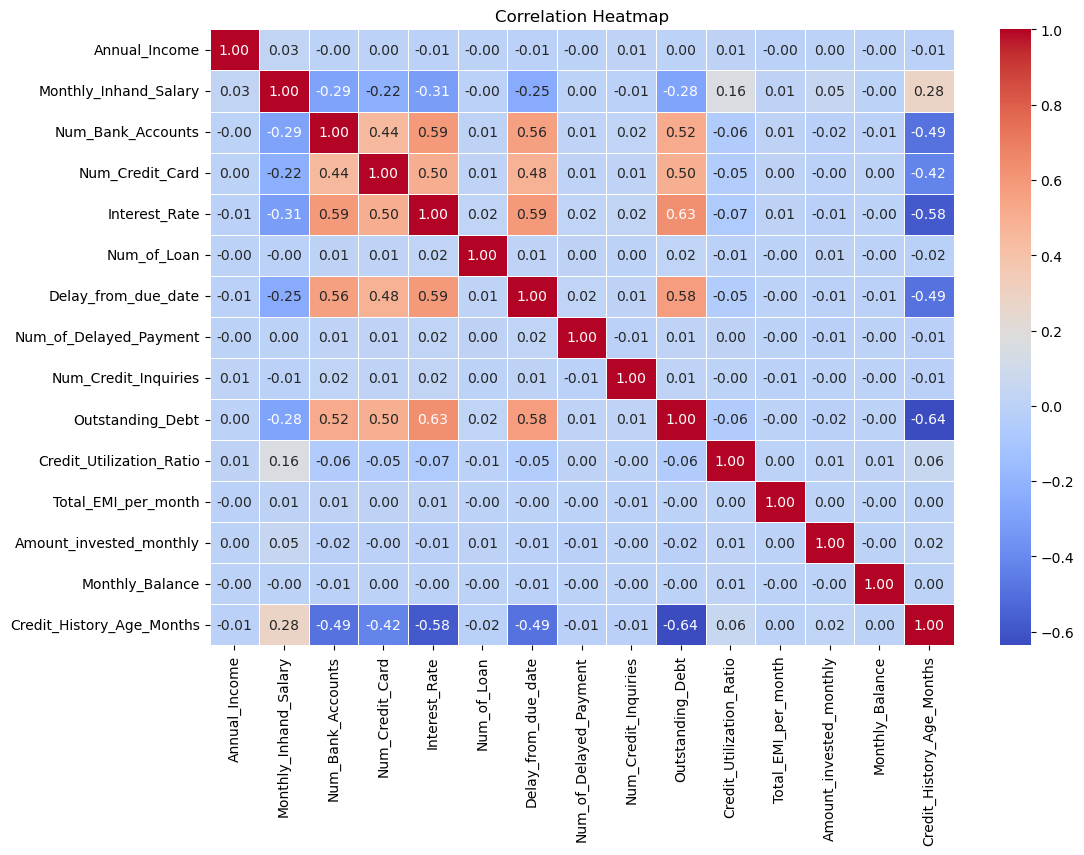

In [7]:
# Select only numerical columns for correlation
numerical_columns = train_data.select_dtypes(include=['float64', 'int64']).columns

# Calculate the correlation matrix
correlation_matrix = train_data[numerical_columns].corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))  # Adjust size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Show the plot
plt.title("Correlation Heatmap")
plt.show()


/var/folders/0d/rbyhbrpx4y35zj7thj223pwc0000gn/T/ipykernel_90515/3407451950.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=train_data, x='Credit_Score', y='Log_Annual_Income', palette='viridis')


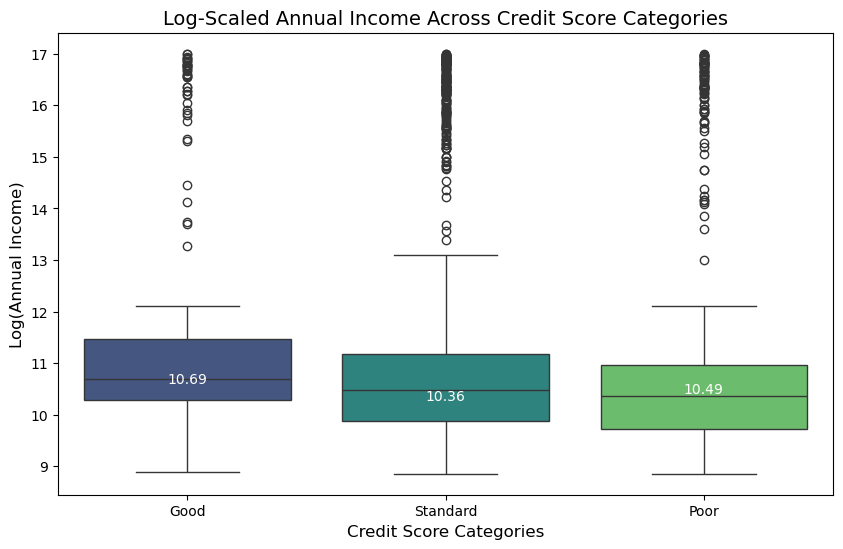

In [18]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Log-transform the Annual_Income column
train_data['Log_Annual_Income'] = train_data['Annual_Income'].apply(lambda x: np.log(x + 1))

# Create the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=train_data, x='Credit_Score', y='Log_Annual_Income', palette='viridis')

# Annotate the median for each category
medians = train_data.groupby('Credit_Score')['Log_Annual_Income'].median()
for i, median in enumerate(medians):
    plt.text(i, median, f'{median:.2f}', ha='center', va='center', fontsize=10, color='white')

# Add titles and labels
plt.title("Log-Scaled Annual Income Across Credit Score Categories", fontsize=14)
plt.xlabel("Credit Score Categories", fontsize=12)
plt.ylabel("Log(Annual Income)", fontsize=12)

# Display the plot
plt.show()


In [34]:
import pandas as pd

# Load your dataset
df = pd.read_csv('Resources/train_cleaned.csv')  # Ensure the file path and name are correct

# Check the data types of the columns
print(df.dtypes)



ID                            object
Annual_Income                float64
Monthly_Inhand_Salary        float64
Num_Bank_Accounts              int64
Num_Credit_Card                int64
Interest_Rate                  int64
Num_of_Loan                    int64
Delay_from_due_date            int64
Num_of_Delayed_Payment         int64
Num_Credit_Inquiries         float64
Credit_Mix                    object
Outstanding_Debt             float64
Credit_Utilization_Ratio     float64
Payment_of_Min_Amount         object
Total_EMI_per_month          float64
Amount_invested_monthly      float64
Monthly_Balance              float64
Credit_Score                  object
Credit_History_Age_Months      int64
dtype: object


In [28]:
print("Mean:", df['Outstanding_Debt'].mean())
print("Median:", df['Outstanding_Debt'].median())
print("Max:", df['Outstanding_Debt'].max())
print("Min:", df['Outstanding_Debt'].min())


Mean: 1510.5004751422912
Median: 1237.97
Max: 4998.07
Min: 0.23


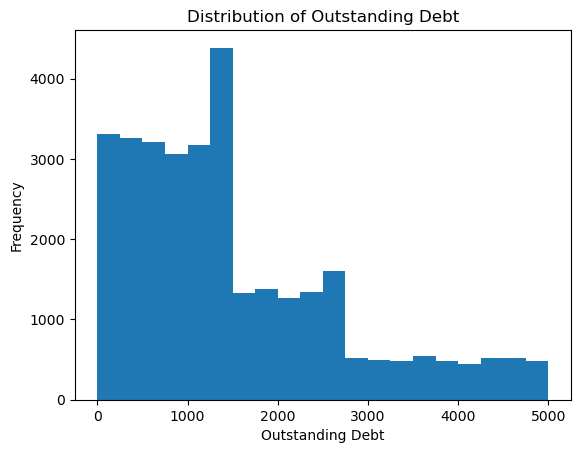

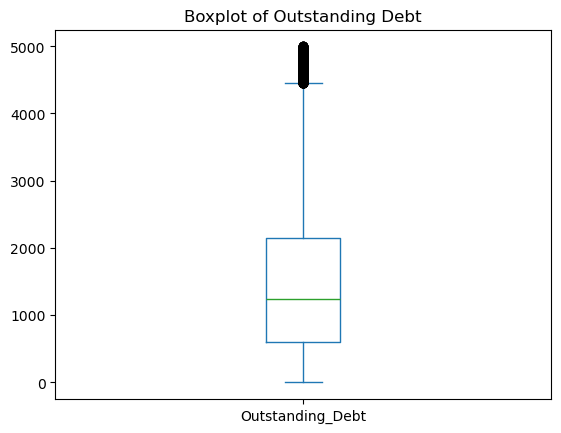

In [29]:
import matplotlib.pyplot as plt

# Histogram
df['Outstanding_Debt'].plot(kind='hist', bins=20, title='Distribution of Outstanding Debt')
plt.xlabel('Outstanding Debt')
plt.show()

# Boxplot
df['Outstanding_Debt'].plot(kind='box', title='Boxplot of Outstanding Debt')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot of Income vs. Credit Score
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Credit_Score', y='Annual_Income', hue='Credit_Score', palette='cool')
plt.title("Scatter Plot: Annual Income vs Credit Score", fontsize=14)
plt.xlabel("Credit Score", fontsize=12)
plt.ylabel("Annual Income", fontsize=12)
plt.show()
